In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [2]:
def bytes_to_mb(bytes):
  return bytes / 1024 / 1024

sigma = 100

def prepare_df(df):
  df['dt'] = df['dt'].astype('datetime64[ms]')
  df['heap_used'] = df['heap_used'].apply(bytes_to_mb)
  df['heap_total'] = df['heap_total'].apply(bytes_to_mb)
  df['approx_heap_used'] = scipy.ndimage.gaussian_filter1d(
    df['heap_used'],
    sigma=sigma
  )
  return df


mutations = prepare_df(pd.read_csv("tests/results/with_mutations.csv"))
no_mutations = prepare_df(pd.read_csv("tests/results/no_mutations.csv"))
assign = prepare_df(pd.read_csv("tests/results/assign.csv"))
slices = prepare_df(pd.read_csv("tests/results/slice.csv"))


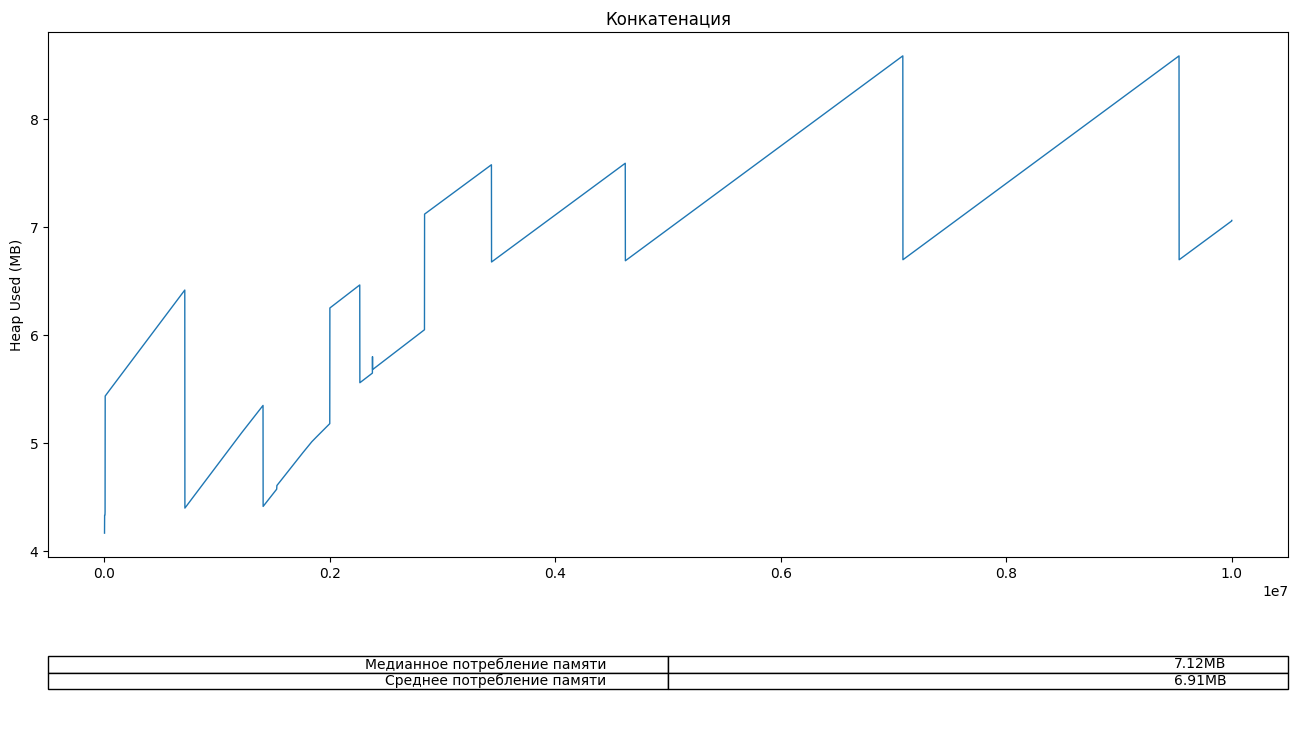

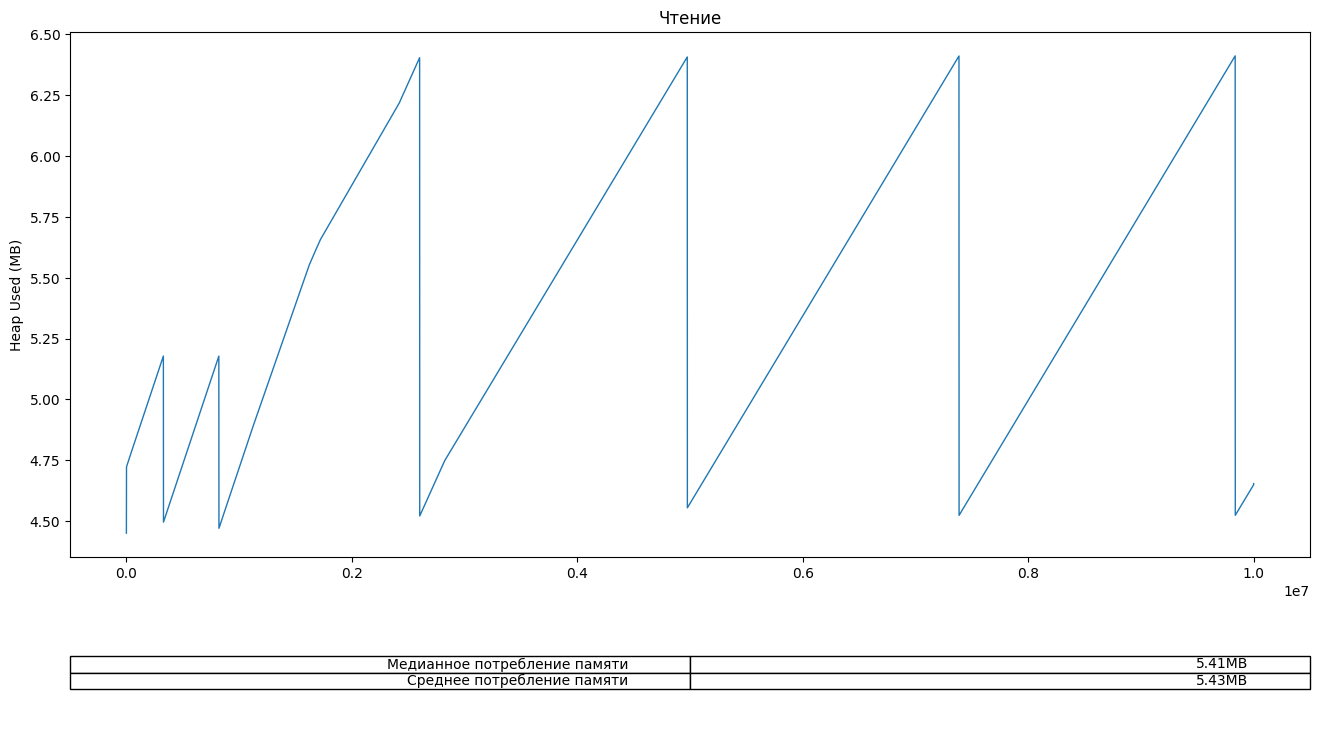

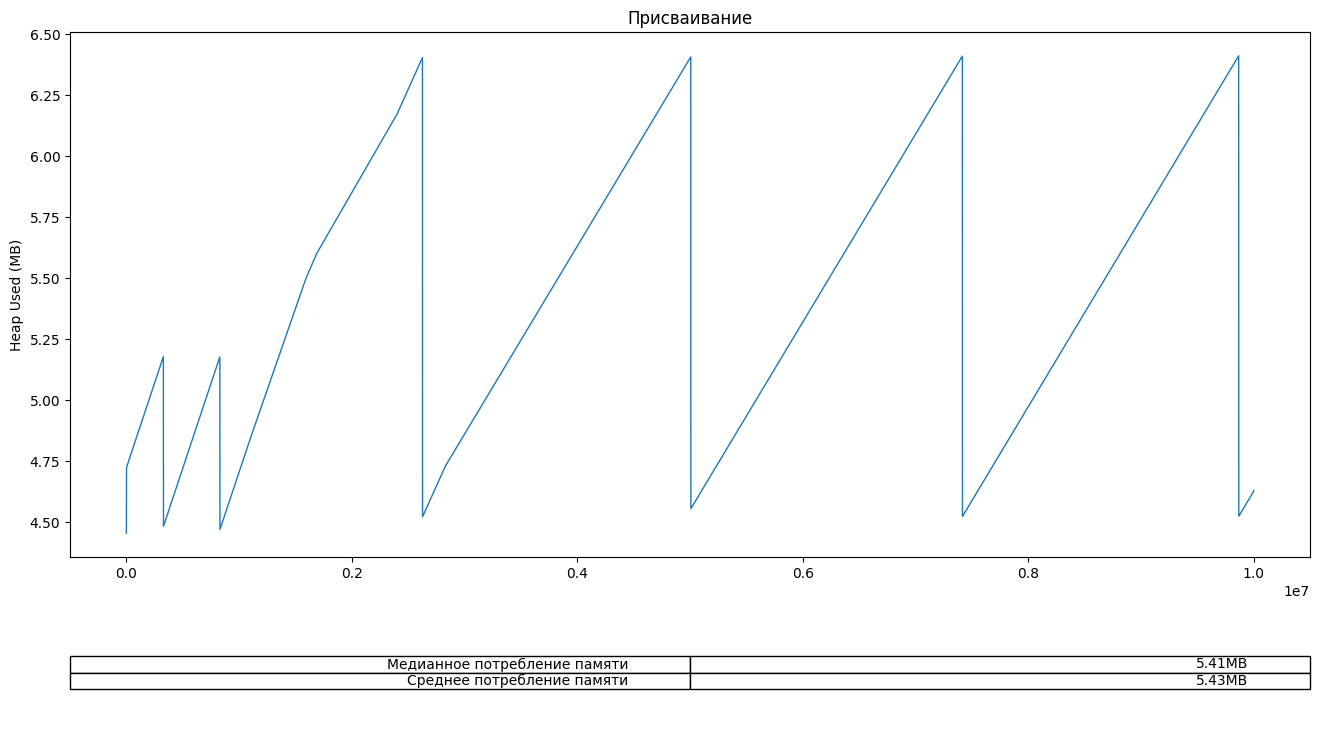

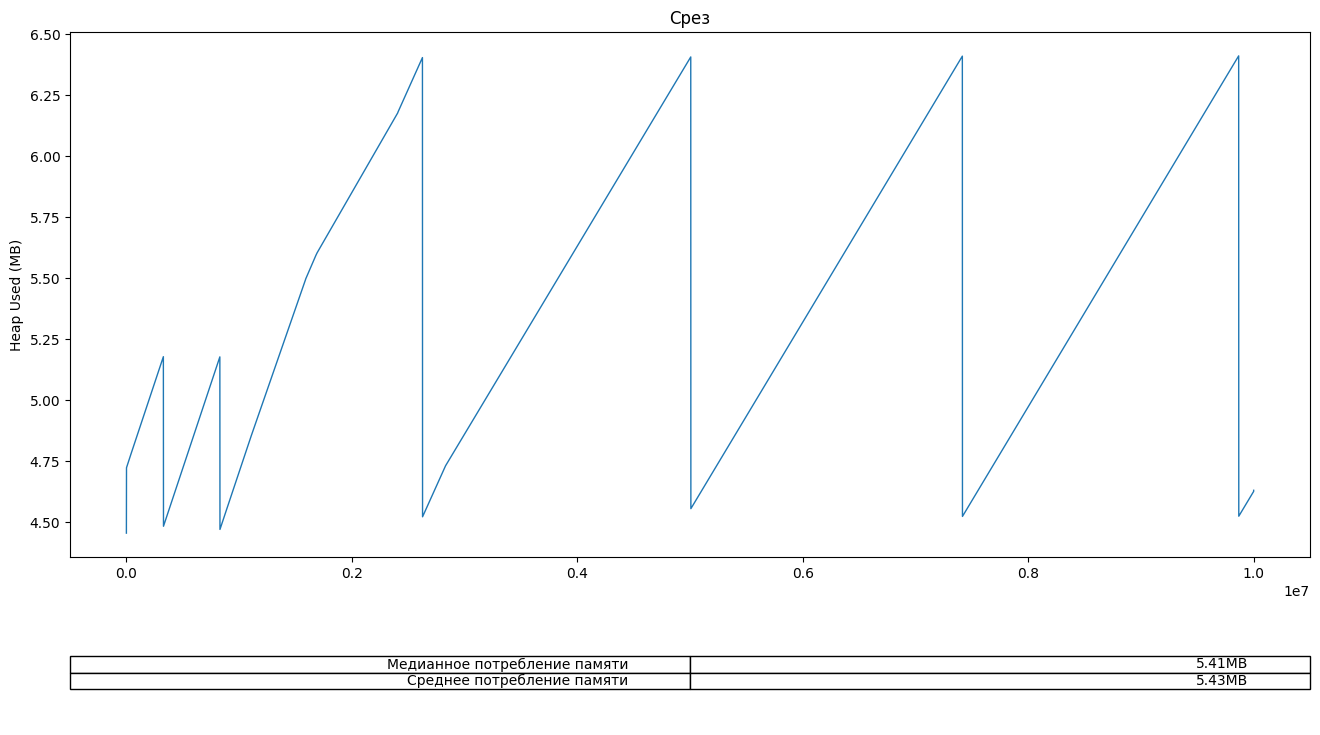

In [14]:
def draw_mem_usage_by_iterations(df, name):
  fig, axs = plt.subplots(
    2,
    1,
    height_ratios=[5, 1],
    figsize=(16, 9),
  )
  axs[0].set_title(name)
  axs[0].set_ylabel('Heap Used (MB)')
  axs[0].plot(
    df['iteration'],
    df['heap_used'],
    lw=1,
  )

  axs[1].table(
    cellText=[
      ['Медианное потребление памяти', str(df['heap_used'].median().round(2)) + 'MB'],
      ['Среднее потребление памяти', str(df['heap_used'].mean().round(2)) + 'MB'],
    ],
    loc='center',
  )
  axs[1].axis('tight')
  axs[1].axis('off')

  plt.show()


draw_mem_usage_by_iterations(mutations, name="Конкатенация")
draw_mem_usage_by_iterations(no_mutations, name="Чтение")
draw_mem_usage_by_iterations(assign, name="Присваивание")
draw_mem_usage_by_iterations(assign, name="Срез")

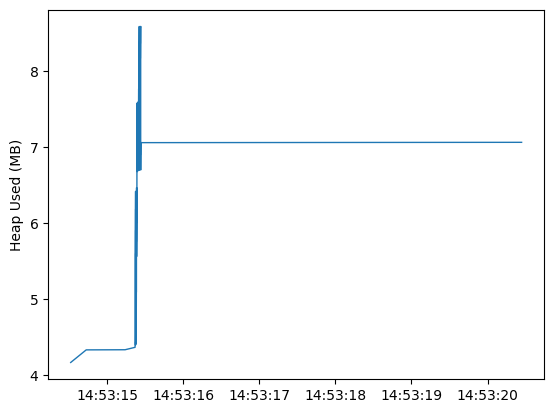

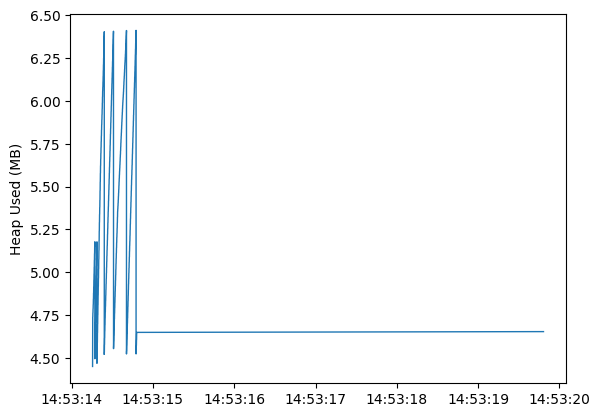

In [4]:
def draw_mem_usage_by_dt(df):
  _, ax = plt.subplots()

  ax.set_ylabel('Heap Used (MB)')

  ax.plot(
    df['dt'],
    df['heap_used'],
    lw=1,
  )

  plt.show()

draw_mem_usage_by_dt(mutations)
draw_mem_usage_by_dt(no_mutations)